## Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    if file != 'Sales_All_Months_2019.csv':
        temp = pd.read_csv("./Sales_Data/"+file)
        temp.dropna(inplace=True)
        all_months_data = pd.concat([all_months_data, temp])



In [5]:
all_months_data.to_csv("./Sales_Data/Sales_All_Months_2019.csv", index=False)

In [53]:
df = pd.read_csv("./Sales_Data/Sales_All_Months_2019.csv")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Question 1: What was the best month for sales? How much was earned that month?

#### What I tried

In [31]:
files = [file for file in os.listdir("./Sales_Data/")]
best_earning = 0
best_month = ''

for file in files:
    if file != 'Sales_All_Months_2019.csv':
        earned_this_month = 0
        temp = pd.read_csv("./Sales_Data/"+file)
        temp.dropna(inplace= True)
        for i in temp.index:
            if (temp['Quantity Ordered'][i] == "Quantity Ordered"):
                temp.drop([i], inplace=True)

        for i in temp.index:
            print(i, temp['Quantity Ordered'][i], temp['Price Each'][i])
            earned_this_month = earned_this_month + (temp['Quantity Ordered'][i] * temp['Price Each'][i])
        
        if earned_this_month > best_earning:
            best_month = file
            best_earning = earned_this_month


0 2 11.95


TypeError: can't multiply sequence by non-int of type 'str'

#### Keith's answer was to augment data with additional columns
(but it's my code, mostly)


- Task 1: Add Month Column

In [57]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = np.where(df.Month == 'Or', float('nan') , df.Month)
df.dropna(inplace=True)
df["Month"] = df["Month"].astype('int32')

In [58]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


- Task 2: Add a sales column

In [59]:
df['Sales'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


- Task 3: Answer the question

In [60]:
temp = df.groupby(['Month']).sum().reset_index()
temp[temp['Sales'] == temp['Sales'].max()]

,Month,Sales
11,12,4613443.34


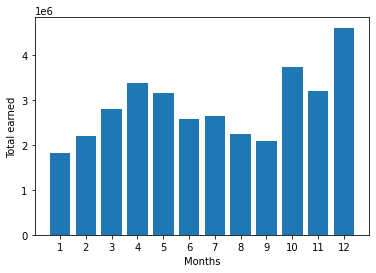

In [61]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, temp['Sales'])
plt.xticks(months)
plt.ylabel("Total earned")
plt.xlabel("Months")
plt.show()

To answer the question: The best month for sales was December where the total earned was 4,613,443.34 (dollars)

## Question 2: What city had the highest number of sales?

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


This seemed to be working, but it was taking sooo long to finish and there was this 'SettingWithCopyWarning'.

In [ ]:
for i in df.index:
    df.iloc[i]['City of Purchase'] = df.iloc[i]['Purchase Address'].split(',')[1].strip()

Found that code on the Internet that worked very quickly.

In [14]:
df['City of Purchase'] = [x.split(',')[1].strip() for x in df['Purchase Address'].values]

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City of Purchase
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [16]:
temp = df.groupby(['City of Purchase']).sum().reset_index()[['City of Purchase','Sales']]
temp

,City of Purchase,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [17]:
temp[temp['Sales'] == temp['Sales'].max()]

,City of Purchase,Sales
7,San Francisco,8262203.91


To answer the question: San Francisco was the city with the highest number of sales, with 8,262,203.91 (dollars).

Keith suggested to use the .apply() method with a lambda function.

He also reminded of the possibility of multiple cities with the same name, so I have to get the name of the city and the state (I think two cities can't have the same name in the same state).

So I have to redo what I did above. I'm going to use lambda function as suggested.

In [18]:
df['City and State'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip()+', '+ x.split(',')[2].split()[0])

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City of Purchase,City and State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,"Boston, MA"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Los Angeles, CA"


In [20]:
df['City and State'].unique()

array(['Dallas, TX', 'Boston, MA', 'Los Angeles, CA', 'San Francisco, CA',
       'Seattle, WA', 'Atlanta, GA', 'New York City, NY', 'Portland, OR',
       'Austin, TX', 'Portland, ME'], dtype=object)

As we can see, there was two different cities with the same name (Portland).

Now I'm going to reanswer question 2 with the new cities values

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City of Purchase,City and State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,"Boston, MA"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Los Angeles, CA"


In [22]:
temp = df.groupby(['City and State'])[['City and State', 'Sales']].sum().reset_index()
temp

,City and State,Sales
0,"Atlanta, GA",2795498.58
1,"Austin, TX",1819581.75
2,"Boston, MA",3661642.01
3,"Dallas, TX",2767975.40
4,"Los Angeles, CA",5452570.80
5,"New York City, NY",4664317.43
6,"Portland, ME",449758.27
7,"Portland, OR",1870732.34
8,"San Francisco, CA",8262203.91
9,"Seattle, WA",2747755.48


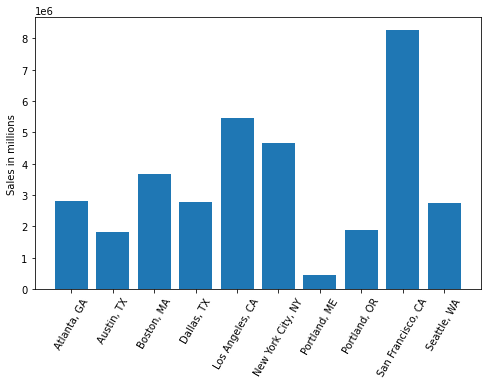

In [23]:
plt.figure(figsize=[8,5])
plt.bar(temp['City and State'], temp['Sales'])
plt.xticks(rotation=60)
plt.ylabel("Sales in millions")
plt.show()

In [24]:
temp[temp['Sales'] == temp['Sales'].max()]

,City and State,Sales
8,"San Francisco, CA",8262203.91


The answer is - still - San Francisco with 8,262,203.91 (dollars). But now it's right!

## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City of Purchase,City and State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,"Boston, MA"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Los Angeles, CA"


In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [27]:
df = df.reindex(columns=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Month','Order Date', 'Purchase Address', 'City and State'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City and State
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001","Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215","Boston, MA"
2,176560,Google Phone,1,600,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA"


In [28]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [29]:
df = df.reindex(columns=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Month','Order Date', 'Hour', 'Minute', 'Purchase Address', 'City and State'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Hour,Minute,Purchase Address,City and State
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,8,46,"917 1st St, Dallas, TX 75001","Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,22,30,"682 Chestnut St, Boston, MA 02215","Boston, MA"
2,176560,Google Phone,1,600,600.00,4,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,9,27,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA"


In [30]:
temp = df[['Hour', 'Sales']].groupby(['Hour']).count().reset_index()
temp

,Hour,Sales
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


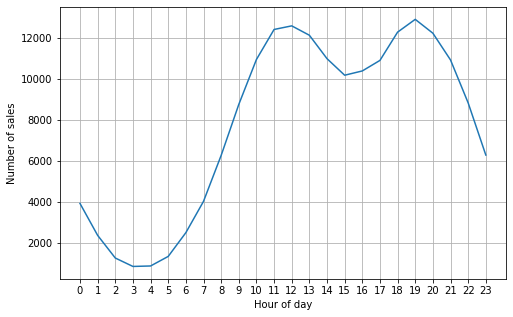

In [31]:
plt.figure(figsize=[8,5])
plt.plot(temp['Hour'], temp['Sales'])
plt.xticks(temp['Hour'])
plt.grid()
plt.xlabel('Hour of day')
plt.ylabel('Number of sales')
plt.show()

Answering the question: the best time to display advertisement should probably be around 11am or 7pm where the peaks of buys are.

## Question 4: What products are most often sold together?

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Hour,Minute,Purchase Address,City and State
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,8,46,"917 1st St, Dallas, TX 75001","Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,22,30,"682 Chestnut St, Boston, MA 02215","Boston, MA"
2,176560,Google Phone,1,600,600.00,4,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,9,27,"333 8th St, Los Angeles, CA 90001","Los Angeles, CA"


In [33]:
temp = df[['Order ID', 'Product']].groupby(['Order ID']).count().reset_index()
temp = temp[temp['Product'] > 1]
temp

,Order ID,Product
41,141275,2
56,141290,2
131,141365,2
150,141384,2
216,141450,2
...,...,...
178302,319536,2
178322,319556,2
178350,319584,2
178362,319596,2


In [34]:
prod = pd.DataFrame()
prod['Product'] = df['Product'].unique()
prod

,Product
0,USB-C Charging Cable
1,Bose SoundSport Headphones
2,Google Phone
3,Wired Headphones
4,Macbook Pro Laptop
5,Lightning Charging Cable
6,27in 4K Gaming Monitor
7,AA Batteries (4-pack)
8,Apple Airpods Headphones
9,AAA Batteries (4-pack)


In [35]:
for product in df['Product'].unique():
    i = 1
    prod.insert(i, product, 0)
    i += 1

In [36]:
prod.set_index('Product', inplace= True)

In [37]:
prod.head()

,34in Ultrawide Monitor,LG Washing Machine,Vareebadd Phone,ThinkPad Laptop,LG Dryer,20in Monitor,27in FHD Monitor,Flatscreen TV,iPhone,AAA Batteries (4-pack),Apple Airpods Headphones,AA Batteries (4-pack),27in 4K Gaming Monitor,Lightning Charging Cable,Macbook Pro Laptop,Wired Headphones,Google Phone,Bose SoundSport Headphones,USB-C Charging Cable
Product,,,,,,,,,,,,,,,,,,,
USB-C Charging Cable,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bose SoundSport Headphones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Google Phone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wired Headphones,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Macbook Pro Laptop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
for id in temp['Order ID']:
    lista = df[df['Order ID'] == id]['Product']
    for i in range(len(lista)):
        bought = lista.iloc[i]
        #print(bought)
        for j in range(i+1, len(lista)):
            bwith = lista.iloc[j]
            #print(bwith)
            prod.at[bwith, bought] += 1

In [39]:
prod

,34in Ultrawide Monitor,LG Washing Machine,Vareebadd Phone,ThinkPad Laptop,LG Dryer,20in Monitor,27in FHD Monitor,Flatscreen TV,iPhone,AAA Batteries (4-pack),Apple Airpods Headphones,AA Batteries (4-pack),27in 4K Gaming Monitor,Lightning Charging Cable,Macbook Pro Laptop,Wired Headphones,Google Phone,Bose SoundSport Headphones,USB-C Charging Cable
Product,,,,,,,,,,,,,,,,,,,
USB-C Charging Cable,15,0,361,9,0,15,12,7,15,50,29,37,12,58,12,45,987,25,48
Bose SoundSport Headphones,6,2,80,9,0,9,12,3,5,20,32,28,9,39,11,21,220,27,77
Google Phone,2,1,4,3,1,2,1,3,3,11,14,11,5,16,4,9,3,8,12
Wired Headphones,11,1,143,4,1,12,10,4,447,43,69,44,11,92,7,35,414,53,160
Macbook Pro Laptop,3,0,0,2,0,4,6,4,3,11,12,8,6,10,3,13,3,4,9
Lightning Charging Cable,18,2,1,11,1,11,18,10,1005,44,35,51,16,54,11,37,12,33,42
27in 4K Gaming Monitor,0,1,2,1,1,0,4,2,6,15,12,14,5,18,7,18,1,10,11
AA Batteries (4-pack),19,1,9,8,4,6,15,8,14,39,29,35,12,55,9,39,14,27,38
Apple Airpods Headphones,8,1,6,7,0,7,12,5,360,33,24,41,10,81,7,31,7,18,34


In [40]:
prod.max()

34in Ultrawide Monitor          19
LG Washing Machine               4
Vareebadd Phone                361
ThinkPad Laptop                 16
LG Dryer                         4
20in Monitor                    15
27in FHD Monitor                21
Flatscreen TV                   11
iPhone                        1005
AAA Batteries (4-pack)          50
Apple Airpods Headphones        69
AA Batteries (4-pack)           51
27in 4K Gaming Monitor          16
Lightning Charging Cable        92
Macbook Pro Laptop              12
Wired Headphones                45
Google Phone                   987
Bose SoundSport Headphones      53
USB-C Charging Cable           160
dtype: int64

In [41]:
prod.nlargest(3, 'iPhone')['iPhone']

Product
Lightning Charging Cable    1005
Wired Headphones             447
Apple Airpods Headphones     360
Name: iPhone, dtype: int64

In [42]:
prod.nlargest(3, 'Google Phone')['Google Phone']

Product
USB-C Charging Cable          987
Wired Headphones              414
Bose SoundSport Headphones    220
Name: Google Phone, dtype: int64

In [43]:
prod.nlargest(3, 'Vareebadd Phone')['Vareebadd Phone']

Product
USB-C Charging Cable          361
Wired Headphones              143
Bose SoundSport Headphones     80
Name: Vareebadd Phone, dtype: int64

Answering the question: The most often combination of products are iPhone with Lighting Charge Cable, Google Phone with USB-C Charging Cable and iPhone with wired Headphones

I was able to get to the correct answer, but my code is not very efficient. Watching Keith's video, his solution was much 'cleaner' and it could get the most common itens that were sold in groups of 3 (or 4, 5, 6...) very quickly.

### Keith's answer

In [44]:
temp = df[df['Order ID'].duplicated(keep= False)]

temp['Grouped'] = temp.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

temp = temp[['Order ID', 'Grouped']].drop_duplicates()

temp

/var/folders/bz/8kdgjkzs0dx299kzyd2mjrl40000gn/T/ipykernel_774/1105554905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Grouped'] = temp.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [45]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in temp['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


So as we can see, it's a much simpler solution.

## Question 5: What product sold the most? Why do you think it sold the most

In [54]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [91]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float64')

In [92]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [93]:
temp = df.groupby('Product').sum().reset_index()
temp[['Product', 'Quantity Ordered']]

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [88]:
maxn = temp.max()['Quantity Ordered']
temp[temp['Quantity Ordered'] == maxn][['Product', 'Quantity Ordered']]

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017


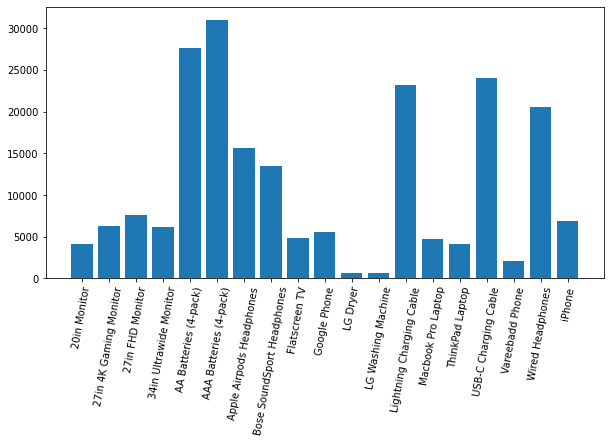

In [73]:
plt.figure(figsize= (10,5))
plt.bar(temp['Product'], temp['Quantity Ordered'])
plt.xticks(rotation= 80)
plt.show()

The most sold product was the AAA Batteries (4-pack) with 31017 items sold.
And a reasonable explanation is that a lot of devices still use batteries to function, and since batteries eventually run out, people have to buy more of them.

Keith suggested that the prices could be an explanation to this items sold, so he suggested plotting the prices of each product together with the plot above.

In [106]:
temp.head()

,Product,Quantity Ordered,Price Each,Month,Sales
0,20in Monitor,4129,451068.99,29336,454148.71
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40


/var/folders/bz/8kdgjkzs0dx299kzyd2mjrl40000gn/T/ipykernel_774/175027829.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation= 85)


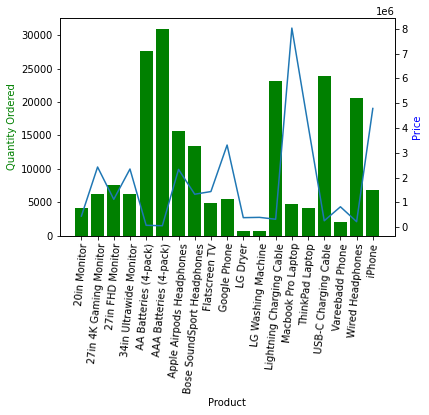

In [112]:
products = temp['Product']
prices = temp.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.bar(products, temp['Quantity Ordered'], color= 'g')
ax2.plot(products, prices)

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color= 'g')
ax2.set_ylabel('Price', color= 'blue')

ax1.set_xticklabels(products, rotation= 85)

plt.show()